## Library setup

In [294]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [295]:
from epidemic_one_dim import Epidemic_1D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300
cmap = mpl.colormaps['autumn']

## Set parameters

In [296]:
patch_pop = 1000
number_of_patches = 50
t_max = 150
t_delta = 1 / 24

params = dict(n=patch_pop, t_max=t_max, k=number_of_patches, t_delta=t_delta)

## Visualise default routines

In [297]:
simple_test_epi = Epidemic_1D(routine_type='simple', **params)
alt_test_epi = Epidemic_1D(routine_type='alternative', **params)

simple_res = simple_test_epi.simulate()
alt_res = alt_test_epi.simulate()

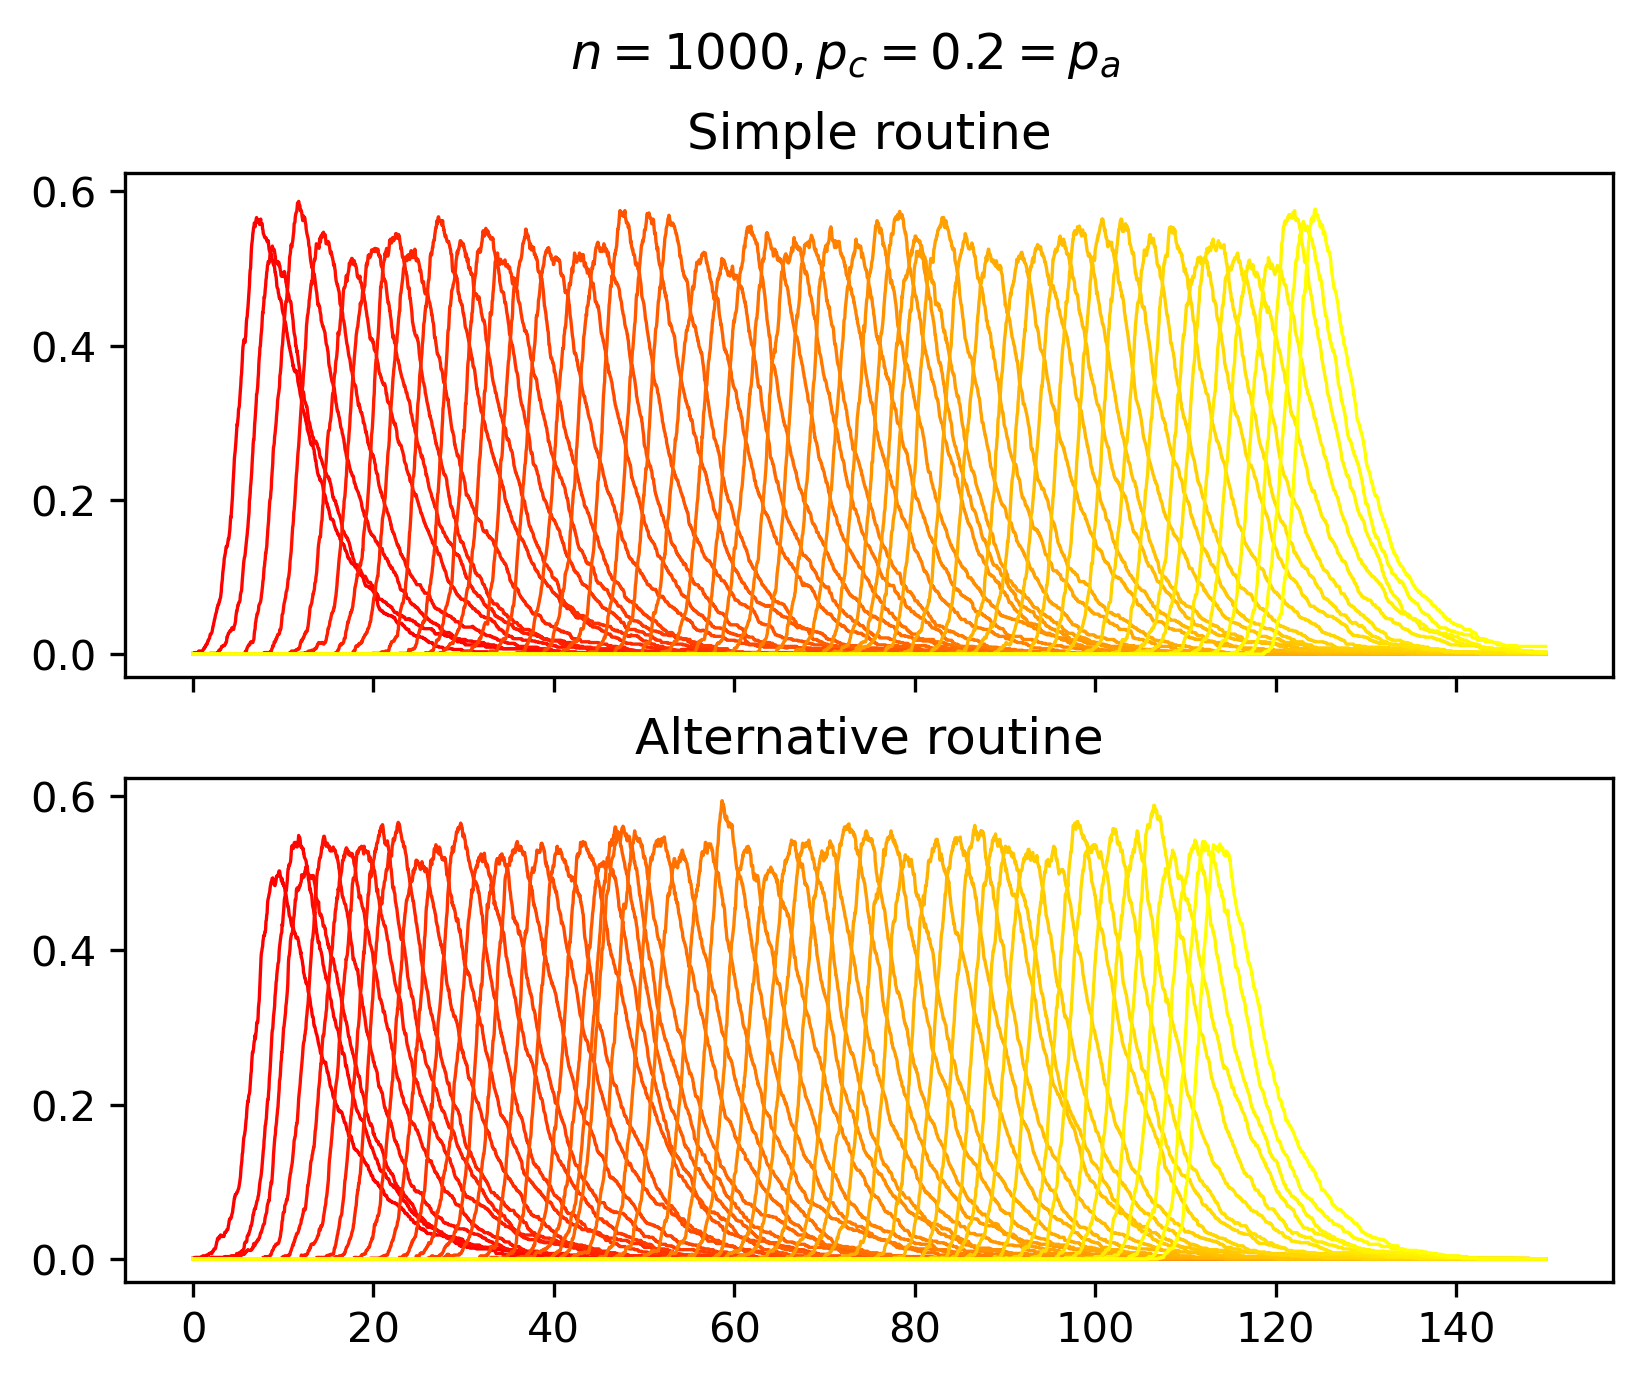

In [298]:
colors = cmap(np.linspace(0, 1, number_of_patches))
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
for i in range(number_of_patches):
    param = dict(color=colors[i], linewidth=0.8)
    ax[0].plot(simple_res[-1], simple_res[1][:, i, :].sum(axis=-1) / patch_pop, **param)
    ax[1].plot(alt_res[-1], alt_res[1][:, i, :].sum(axis=-1) / patch_pop, **param)
ax[0].set_title('Simple routine')
ax[1].set_title('Alternative routine')
fig.suptitle(f'$n = {params['n']}, p_c=0.2 = p_a$')
plt.show()

# Visualise wave-speed difference

In [320]:
n_points = 5
n_samples = 5

adventurer_props = np.linspace(0, 0.5, n_points)
alt_series = np.zeros(shape=(n_points, n_samples, number_of_patches))
alt_epidemic = Epidemic_1D(routine_type='alternative', **params)

for point, p_a in enumerate(adventurer_props):
    # update routine parameters
    alt_epidemic.set_routine_params(dict(p_a=p_a, p_c = 0.3))
    for sample in range(n_samples):
        print(point, sample)
        alt_res = alt_epidemic.simulate()
        alt_series[point, sample, :] = (alt_res[1].sum(axis=-1)).argmax(axis=0) * t_delta

0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4
2 0
Extinction event occurred, restarting
2 1
2 2
2 3
2 4
3 0
3 1
3 2
3 3
Extinction event occurred, restarting
3 4
4 0
4 1
4 2
4 3
4 4
Extinction event occurred, restarting


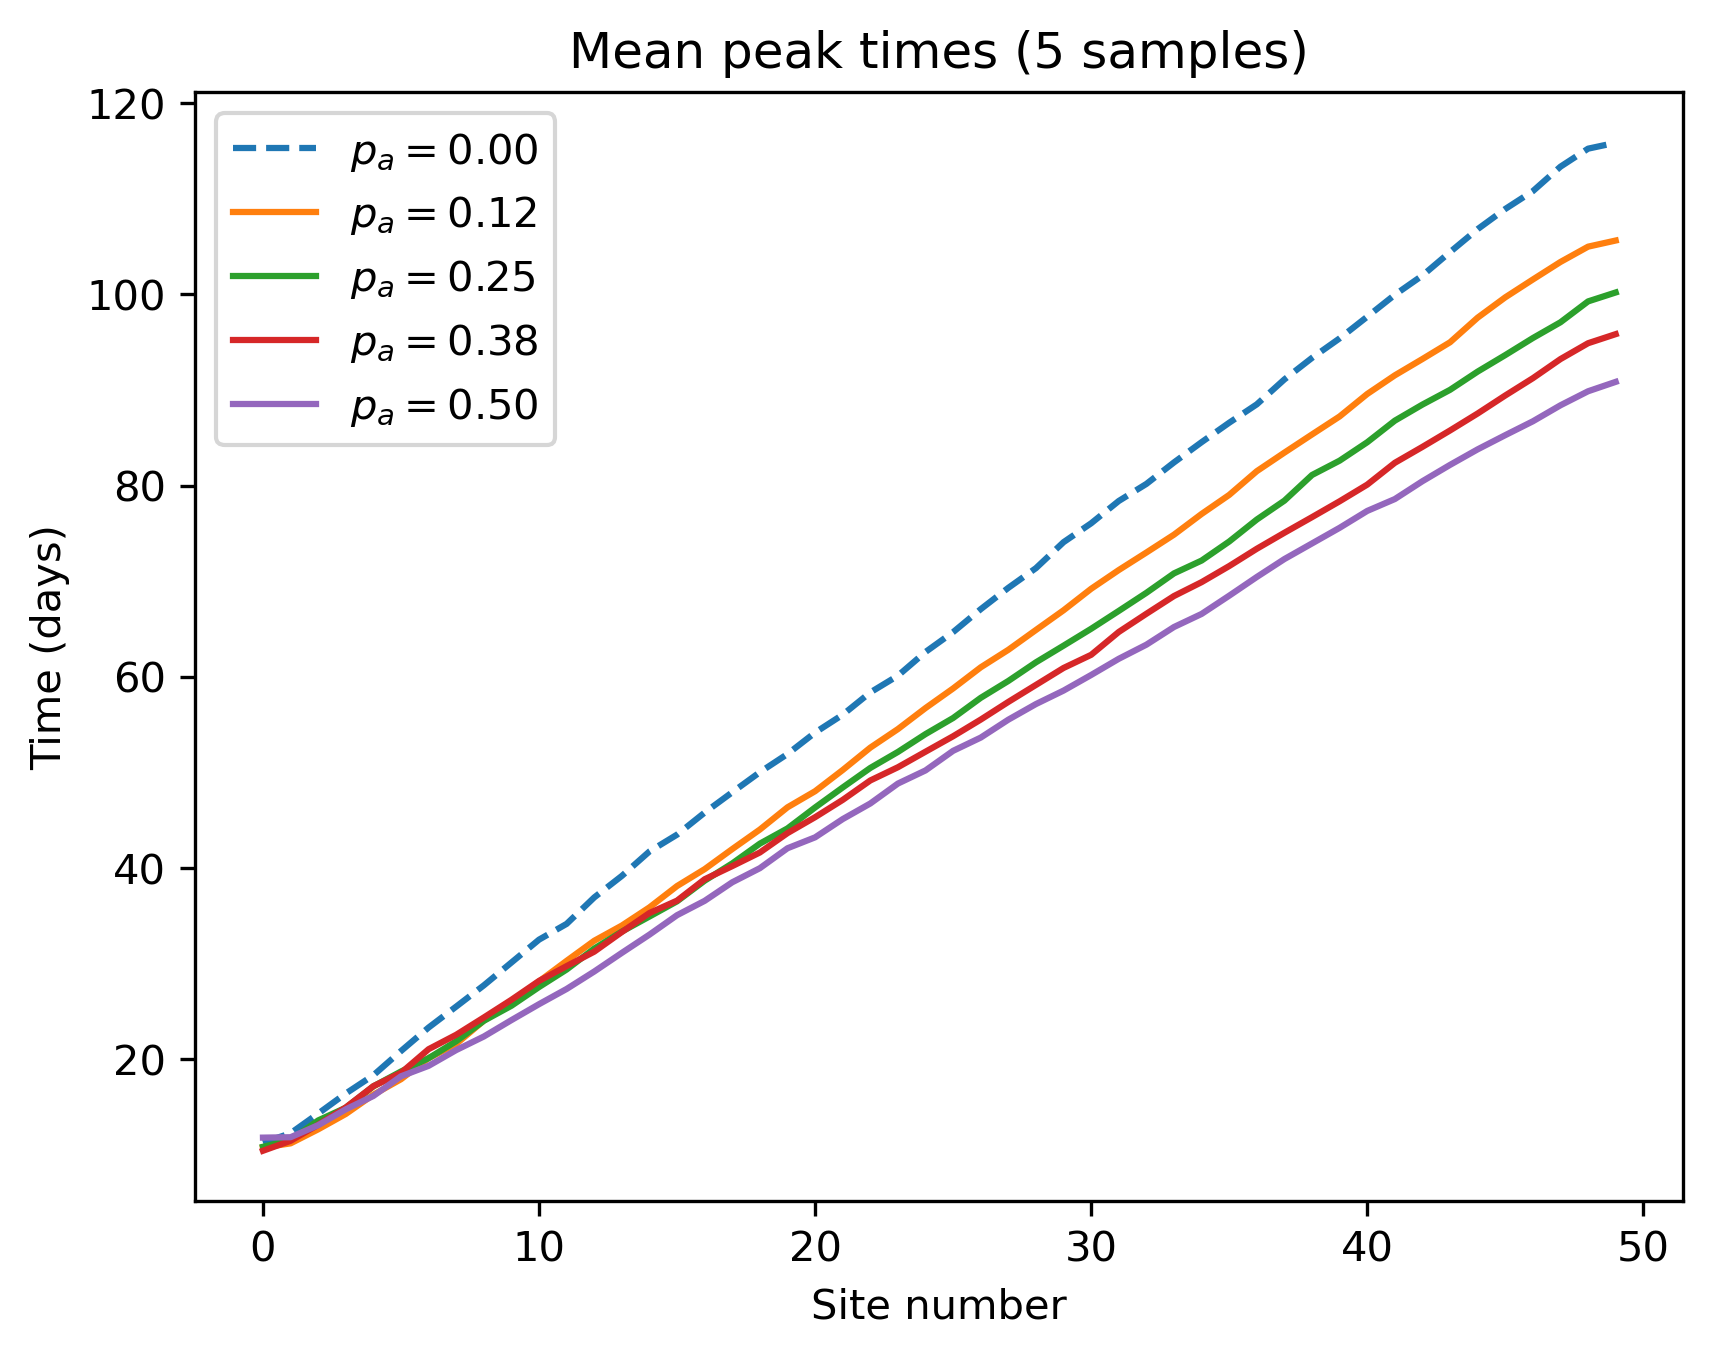

In [322]:
simple = np.mean((alt_series[0]), axis=0)
plt.plot(simple, linestyle='--', label='$p_a = 0.00$')
for i in range(1,len(adventurer_props)):
    alt = np.mean(alt_series[i, ...], axis=0)
    plt.plot(alt, label=f'$p_a ={adventurer_props[i]:.2f}$')
plt.legend()
plt.title(f'Mean peak times ({n_samples} samples)')
plt.xlabel('Site number')
plt.ylabel('Time (days)')
plt.show()